### Setup

In [1]:
pip install -U scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=f985737ca57d18a2d0bf4fcb3a4d5853d68afd4621672a88695d09afa0aa91b8
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [2]:
pip install spacy-cld


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 21.7 MB/s eta 0:00:00
  Created wheel for spacy-cld: filename=spacy_cld-0.1.0-py3-none-any.whl size=4049 sha256=4ac9e41e0b1df5db66aacdc38f9c91a2a569ca34d7b41470b2fb7f8369c10642
  Stored in directory: /root/.cache/pip/wheels/72/da/6a/61441ff0bd7bcd8c96a99a8135766e2784f82dd0ec46987cd2
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9915800 sha256=e8c39a8ae91d7937b703d92c9c8e337ee859c01c012ec64cdbcd6f769af55123
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d

<ipython-input-3-435614c384a2>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()  # Enable tracking of progress in dataframe `apply` calls


0it [00:00, ?it/s]

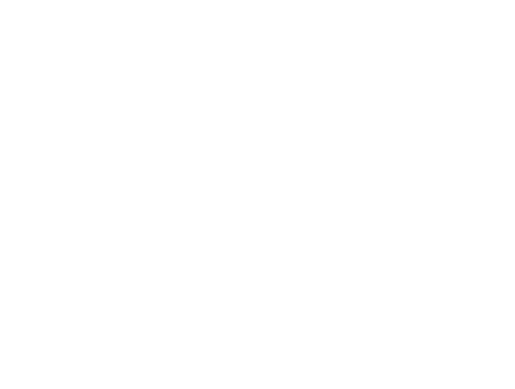

In [3]:
# library imports
import re
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
width = 0.75
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.axis('off')
from nltk.corpus import stopwords
from textblob import TextBlob
import scattertext as st
import spacy
import spacy_cld

from IPython.display import IFrame
from IPython.core.display import display, HTML
from collections import Counter
from tqdm import tqdm_notebook as tqdm  # cool progress bars
tqdm().pandas()  # Enable tracking of progress in dataframe `apply` calls

In [4]:
import string


In [5]:
from nltk.corpus import stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.stem import WordNetLemmatizer

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
pip install empath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57800 sha256=a22454da9d6102545c58fa9a695906d31ee84717283d96f192c56b4bf94d9298
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd /content/drive/MyDrive/nlp_project_customer_support

/content/drive/MyDrive/nlp_project_customer_support


In [12]:
!python -m spacy download en

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz#egg=en_core_web_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 82.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047087 sha256=55d32b748ada3e09e9eef1671a1797d4960339a309301adad38d64ca0849afc1
  Stored in directory: /root/.cache/pip/wheels/4f/1f/0e/16fae4b01d2d87454e0f484e58c48793efcf237f0894c1c4bd
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-

### Preproccesing

In [13]:
tweets = pd.read_csv('/content/drive/MyDrive/nlp_project_customer_support/twcs/twcs.csv',encoding='utf-8')
print(tweets.shape)
tweets.head()

(2811774, 7)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [14]:
# Pick only inbound tweets that aren't in reply to anything...
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]
print('Found {} first inbound messages.'.format(len(first_inbound)))

# Merge in all tweets in response
inbounds_and_outbounds = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')
print("Found {} responses.".format(len(inbounds_and_outbounds)))

# Filter out cases where reply tweet isn't from company
inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

inbounds_and_outbounds.head(10)

Found 787346 first inbound messages.
Found 875292 responses.


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0
5,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,28,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,24,29.0
6,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,30,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",NaN,31.0
7,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,32,Ask_Spectrum,False,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,NaN,33.0
8,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,34,NaN,34,VerizonSupport,False,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,35,36.0
9,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,38,NaN,38,VerizonSupport,False,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM,NaN,39.0


In [15]:
#making sure the dataframe contains only the needed columns
inbounds = inbounds_and_outbounds[["author_id_x","created_at_x","text_x","author_id_y"]]
inbounds.head(10)

,author_id_x,created_at_x,text_x,author_id_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,Ask_Spectrum
6,115717,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",Ask_Spectrum
7,115718,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,Ask_Spectrum
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,VerizonSupport
9,115720,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,VerizonSupport


In [16]:
inbounds_gaming = inbounds[(inbounds["author_id_y"]=="XboxSupport")|(inbounds["author_id_y"]=="AskPlayStation")]
inbounds_gaming.head(10)

,author_id_x,created_at_x,text_x,author_id_y
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport
63,115791,Tue Oct 31 19:39:09 +0000 2017,@1520 @XboxSupport the 5 app on Xboxes not wo...,XboxSupport
337,116001,Tue Oct 31 12:02:26 +0000 2017,@AskPlayStation can you dm me I have a question,AskPlayStation
339,116003,Tue Oct 31 10:53:49 +0000 2017,"@AskPlayStation compre una tarjeta de 50$, la ...",AskPlayStation
340,116004,Tue Oct 31 11:17:00 +0000 2017,Yo my PS4 has been turning on by itself recent...,AskPlayStation
341,116005,Tue Oct 31 22:20:03 +0000 2017,@AskPlayStation My account is telling me to re...,AskPlayStation


In [17]:
# Get the number of rows in the DataFrame
num_rows = inbounds_gaming.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)

Number of rows: 23906


In [18]:
inbounds_gaming["text_x_lower"] = inbounds_gaming["text_x"].str.lower()
inbounds_gaming.head()

<ipython-input-18-7f42bdaece30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming["text_x_lower"] = inbounds_gaming["text_x"].str.lower()


,author_id_x,created_at_x,text_x,author_id_y,text_x_lower
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation,"@askplaystation so, what's the november ps plu..."
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation,@askplaystation i bought lego star wars in the...
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation,@askplaystation can i block a community from s...
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport,@xboxsupport can i change me sons xbox live ac...
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport,@115790 @xboxsupport redeemed a code for fifa ...


In [19]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

inbounds_gaming["text_wo_punct"] = inbounds_gaming["text_x_lower"].apply(lambda text: remove_punctuation(text))
inbounds_gaming.head(30)

<ipython-input-19-de503f19ba3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming["text_wo_punct"] = inbounds_gaming["text_x_lower"].apply(lambda text: remove_punctuation(text))


,author_id_x,created_at_x,text_x,author_id_y,text_x_lower,text_wo_punct
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation,"@askplaystation so, what's the november ps plu...",askplaystation so whats the november ps plus f...
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation,@askplaystation i bought lego star wars in the...,askplaystation i bought lego star wars in the ...
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation,@askplaystation can i block a community from s...,askplaystation can i block a community from se...
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport,@xboxsupport can i change me sons xbox live ac...,xboxsupport can i change me sons xbox live acc...
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport,@115790 @xboxsupport redeemed a code for fifa ...,115790 xboxsupport redeemed a code for fifa po...
63,115791,Tue Oct 31 19:39:09 +0000 2017,@1520 @XboxSupport the 5 app on Xboxes not wo...,XboxSupport,@1520 @xboxsupport the 5 app on xboxes not wo...,1520 xboxsupport the 5 app on xboxes not work...
337,116001,Tue Oct 31 12:02:26 +0000 2017,@AskPlayStation can you dm me I have a question,AskPlayStation,@askplaystation can you dm me i have a question,askplaystation can you dm me i have a question
339,116003,Tue Oct 31 10:53:49 +0000 2017,"@AskPlayStation compre una tarjeta de 50$, la ...",AskPlayStation,"@askplaystation compre una tarjeta de 50$, la ...",askplaystation compre una tarjeta de 50 la met...
340,116004,Tue Oct 31 11:17:00 +0000 2017,Yo my PS4 has been turning on by itself recent...,AskPlayStation,yo my ps4 has been turning on by itself recent...,yo my ps4 has been turning on by itself recent...
341,116005,Tue Oct 31 22:20:03 +0000 2017,@AskPlayStation My account is telling me to re...,AskPlayStation,@askplaystation my account is telling me to re...,askplaystation my account is telling me to res...


In [20]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [21]:
", ".join(stopwords.words('spanish'))

'de, la, que, el, en, y, a, los, del, se, las, por, un, para, con, no, una, su, al, lo, como, más, pero, sus, le, ya, o, este, sí, porque, esta, entre, cuando, muy, sin, sobre, también, me, hasta, hay, donde, quien, desde, todo, nos, durante, todos, uno, les, ni, contra, otros, ese, eso, ante, ellos, e, esto, mí, antes, algunos, qué, unos, yo, otro, otras, otra, él, tanto, esa, estos, mucho, quienes, nada, muchos, cual, poco, ella, estar, estas, algunas, algo, nosotros, mi, mis, tú, te, ti, tu, tus, ellas, nosotras, vosotros, vosotras, os, mío, mía, míos, mías, tuyo, tuya, tuyos, tuyas, suyo, suya, suyos, suyas, nuestro, nuestra, nuestros, nuestras, vuestro, vuestra, vuestros, vuestras, esos, esas, estoy, estás, está, estamos, estáis, están, esté, estés, estemos, estéis, estén, estaré, estarás, estará, estaremos, estaréis, estarán, estaría, estarías, estaríamos, estaríais, estarían, estaba, estabas, estábamos, estabais, estaban, estuve, estuviste, estuvo, estuvimos, estuvisteis, estuvi

In [22]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

inbounds_gaming["text_wo_stop_eng"] = inbounds_gaming["text_wo_punct"].apply(lambda text: remove_stopwords(text))
inbounds_gaming.head()

<ipython-input-22-6b96607797f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming["text_wo_stop_eng"] = inbounds_gaming["text_wo_punct"].apply(lambda text: remove_stopwords(text))


,author_id_x,created_at_x,text_x,author_id_y,text_x_lower,text_wo_punct,text_wo_stop_eng
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation,"@askplaystation so, what's the november ps plu...",askplaystation so whats the november ps plus f...,askplaystation whats november ps plus free game
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation,@askplaystation i bought lego star wars in the...,askplaystation i bought lego star wars in the ...,askplaystation bought lego star wars playstati...
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation,@askplaystation can i block a community from s...,askplaystation can i block a community from se...,askplaystation block community sending invites...
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport,@xboxsupport can i change me sons xbox live ac...,xboxsupport can i change me sons xbox live acc...,xboxsupport change sons xbox live account hotm...
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport,@115790 @xboxsupport redeemed a code for fifa ...,115790 xboxsupport redeemed a code for fifa po...,115790 xboxsupport redeemed code fifa points a...


In [23]:
STOPWORDS = set(stopwords.words('spanish'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

inbounds_gaming["text_wo_stop_eng_spa"] = inbounds_gaming["text_wo_stop_eng"].apply(lambda text: remove_stopwords(text))
inbounds_gaming.head()

<ipython-input-23-730892a43485>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming["text_wo_stop_eng_spa"] = inbounds_gaming["text_wo_stop_eng"].apply(lambda text: remove_stopwords(text))


,author_id_x,created_at_x,text_x,author_id_y,text_x_lower,text_wo_punct,text_wo_stop_eng,text_wo_stop_eng_spa
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation,"@askplaystation so, what's the november ps plu...",askplaystation so whats the november ps plus f...,askplaystation whats november ps plus free game,askplaystation whats november ps plus free game
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation,@askplaystation i bought lego star wars in the...,askplaystation i bought lego star wars in the ...,askplaystation bought lego star wars playstati...,askplaystation bought lego star wars playstati...
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation,@askplaystation can i block a community from s...,askplaystation can i block a community from se...,askplaystation block community sending invites...,askplaystation block community sending invites...
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport,@xboxsupport can i change me sons xbox live ac...,xboxsupport can i change me sons xbox live acc...,xboxsupport change sons xbox live account hotm...,xboxsupport change sons xbox live account hotm...
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport,@115790 @xboxsupport redeemed a code for fifa ...,115790 xboxsupport redeemed a code for fifa po...,115790 xboxsupport redeemed code fifa points a...,115790 xboxsupport redeemed code fifa points a...


In [24]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

inbounds_gaming["text_lemmatized"] = inbounds_gaming["text_wo_stop_eng_spa"].apply(lambda text: lemmatize_words(text))
inbounds_gaming.head(5)

<ipython-input-24-58b01f1bbbca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming["text_lemmatized"] = inbounds_gaming["text_wo_stop_eng_spa"].apply(lambda text: lemmatize_words(text))


,author_id_x,created_at_x,text_x,author_id_y,text_x_lower,text_wo_punct,text_wo_stop_eng,text_wo_stop_eng_spa,text_lemmatized
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation,"@askplaystation so, what's the november ps plu...",askplaystation so whats the november ps plus f...,askplaystation whats november ps plus free game,askplaystation whats november ps plus free game,askplaystation whats november p plus free game
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation,@askplaystation i bought lego star wars in the...,askplaystation i bought lego star wars in the ...,askplaystation bought lego star wars playstati...,askplaystation bought lego star wars playstati...,askplaystation bought lego star war playstatio...
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation,@askplaystation can i block a community from s...,askplaystation can i block a community from se...,askplaystation block community sending invites...,askplaystation block community sending invites...,askplaystation block community sending invite ...
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport,@xboxsupport can i change me sons xbox live ac...,xboxsupport can i change me sons xbox live acc...,xboxsupport change sons xbox live account hotm...,xboxsupport change sons xbox live account hotm...,xboxsupport change son xbox live account hotma...
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport,@115790 @xboxsupport redeemed a code for fifa ...,115790 xboxsupport redeemed a code for fifa po...,115790 xboxsupport redeemed code fifa points a...,115790 xboxsupport redeemed code fifa points a...,115790 xboxsupport redeemed code fifa point af...


In [25]:
import re

# Assuming the DataFrame is named 'df' and the column is named 'text_column'

inbounds_gaming["text_lemmatized_no_ids"] = inbounds_gaming["text_lemmatized"].apply(lambda text: re.sub(r'\b\d{6}\b', '', text))


<ipython-input-25-cdfd4bf9b5d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming["text_lemmatized_no_ids"] = inbounds_gaming["text_lemmatized"].apply(lambda text: re.sub(r'\b\d{6}\b', '', text))


In [27]:
inbounds_gaming.head(5)

,author_id_x,created_at_x,text_x,author_id_y,text_x_lower,text_wo_punct,text_wo_stop_eng,text_wo_stop_eng_spa,text_lemmatized,text_lemmatized_no_ids
30,115743,Tue Oct 31 08:17:37 +0000 2017,"@AskPlayStation So, what's the november ps plu...",AskPlayStation,"@askplaystation so, what's the november ps plu...",askplaystation so whats the november ps plus f...,askplaystation whats november ps plus free game,askplaystation whats november ps plus free game,askplaystation whats november p plus free game,askplaystation whats november p plus free game
31,115745,Tue Oct 31 08:14:24 +0000 2017,@AskPlayStation I bought Lego Star Wars in the...,AskPlayStation,@askplaystation i bought lego star wars in the...,askplaystation i bought lego star wars in the ...,askplaystation bought lego star wars playstati...,askplaystation bought lego star wars playstati...,askplaystation bought lego star war playstatio...,askplaystation bought lego star war playstatio...
32,115746,Tue Oct 31 07:58:24 +0000 2017,@AskPlayStation can i block a community from s...,AskPlayStation,@askplaystation can i block a community from s...,askplaystation can i block a community from se...,askplaystation block community sending invites...,askplaystation block community sending invites...,askplaystation block community sending invite ...,askplaystation block community sending invite ...
50,115771,Sat Dec 02 09:17:57 +0000 2017,@XboxSupport can I change me sons Xbox live ac...,XboxSupport,@xboxsupport can i change me sons xbox live ac...,xboxsupport can i change me sons xbox live acc...,xboxsupport change sons xbox live account hotm...,xboxsupport change sons xbox live account hotm...,xboxsupport change son xbox live account hotma...,xboxsupport change son xbox live account hotma...
62,115789,Tue Oct 31 21:17:16 +0000 2017,@115790 @XboxSupport redeemed a code for fifa ...,XboxSupport,@115790 @xboxsupport redeemed a code for fifa ...,115790 xboxsupport redeemed a code for fifa po...,115790 xboxsupport redeemed code fifa points a...,115790 xboxsupport redeemed code fifa points a...,115790 xboxsupport redeemed code fifa point af...,xboxsupport redeemed code fifa point afternoo...


### Comparison of word frequency between Playstation and Xbox

In [28]:
nlp = spacy.load('en',disable_pipes=["tagger","ner"])
inbounds_gaming['parsed'] = inbounds_gaming.text_lemmatized_no_ids.progress_apply(nlp)

  0%|          | 0/23906 [00:00<?, ?it/s]

<ipython-input-28-c586b46879cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbounds_gaming['parsed'] = inbounds_gaming.text_lemmatized_no_ids.progress_apply(nlp)


In [29]:
corpus = st.CorpusFromParsedDocuments(inbounds_gaming,
                             category_col='author_id_y',
                             parsed_col='parsed').build()

In [30]:
html = st.produce_scattertext_explorer(corpus,
          category='AskPlayStation',
          category_name='Ask PlayStation',
          not_category_name='Xbox Support',
          width_in_pixels=600,
          minimum_term_frequency=10,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
          )

In [31]:
filename = "XboxSupport-vs-AskPlayStation_4.html"
open(filename, 'w', encoding='utf-8').write(html)

3572752

### Comparison of topics between Playstation and Xbox

In [32]:
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(inbounds_gaming,
                                              category_col='author_id_y',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='parsed').build()

In [33]:
html = st.produce_scattertext_explorer(empath_corpus,
                                        category='AskPlayStation',
                                        category_name='Ask PlayStation',
                                        not_category_name='Xbox Support',
                                        width_in_pixels=700,
                                        metadata=inbounds_gaming['author_id_y'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())

In [34]:
filename = "empath-AP-vs-XS-2.html"
open(filename, 'w', encoding='utf-8').write(html)

6005865

### Comparison of word frequencies associated with the term "problem" between Playstation and Xbox

In [35]:
corpus = (st.CorpusFromParsedDocuments(inbounds_gaming,
                             category_col='author_id_y',
                             parsed_col='parsed').build().get_stoplisted_unigram_corpus())

In [36]:
target_term = 'problem'
html = st.word_similarity_explorer(corpus,
                                   category='AskPlayStation',
                                   category_name='Ask PlayStation',
                                   not_category_name='Xbox Support',
                                   target_term=target_term,
                                   minimum_term_frequency=5,
                                   width_in_pixels=800)

/usr/local/lib/python3.10/dist-packages/scattertext/__init__.py:1064: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  scores = np.array([base_term.similarity(nlp(tok))


In [37]:
filename = "similarity2.html"
open(filename, 'w', encoding='utf-8').write(html)

3575644